# Per Capita Personal Income NY vs. USA

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from functools import reduce
import pandas as pd
import numpy as np
import datetime


### Data Sources: Per Capita Personal Income from FRED Economic Data

<a href=https://fred.stlouisfed.org/series/NYPCPI>NY FRED Economic Data PCPI</a>

<a href=https://fred.stlouisfed.org/series/PCPI36005>NY Bronx FRED Economic Data PCPI</a>

<a href=https://fred.stlouisfed.org/series/PCPI36047>NY Kings FRED Economic Data PCPI</a>

<a href=https://fred.stlouisfed.org/series/A792RC0A052NBEA>USA FRED Economic Data PCPI</a>

In [3]:
# Data Sources: Per Capita Personal Income from FRED Economic Data
# NY https://fred.stlouisfed.org/series/NYPCPI
# NY Bronx https://fred.stlouisfed.org/series/PCPI36005
# NY Kings https://fred.stlouisfed.org/series/PCPI36047
# USA https://fred.stlouisfed.org/series/A792RC0A052NBEA

df_NYPCPI = pd.read_csv('Data/PCPI_NYState.csv', skiprows=1, names=['Date', 'PCPI'])
df_NYBronx_PCPI = pd.read_csv('Data/PCPI_NY_BronxCounty.csv', skiprows=1, names=['Date', 'PCPI'])
df_NYKings_PCPI = pd.read_csv('Data/PCPI_NY_KingsCounty.csv', skiprows=1, names=['Date', 'PCPI'])
df_USPCPI = pd.read_csv('Data/PCPI_USA.csv', skiprows=1, names=['Date', 'PCPI'])


In [4]:
# Ensure Date is datetime type

dfList = [df_USPCPI, df_NYPCPI, df_NYBronx_PCPI, df_NYKings_PCPI]
for df in dfList:
    df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Method 1 (NOT Used): .merge()

dfList = [df_USPCPI, df_NYPCPI, df_NYBronx_PCPI, df_NYKings_PCPI]

# dfPCPIa = pd.concat(dfList, join='outer', axis=1)
# dfPCPIa = df_USPCPI.merge(df_NYPCPI, how='left', on='Date')

dfPCPIa = df_USPCPI.merge(df_NYPCPI.merge(df_NYBronx_PCPI.merge(df_NYKings_PCPI, on='Date'), on='Date'), on='Date')
dfPCPIa.columns = ['Date', 'USA PCPI', 'NY PCPI', 'Bronx PCPI', 'Kings PCPI']

dfPCPIa.head()


,Date,USA PCPI,NY PCPI,Bronx PCPI,Kings PCPI
0,1969-01-01,3948,4619.0,3632,3850
1,1970-01-01,4218,4920.0,3839,4129
2,1971-01-01,4491,5234.0,3999,4336
3,1972-01-01,4880,5603.0,4199,4674
4,1973-01-01,5383,6022.0,4497,5000


In [6]:
# Method 2: reduce and .merge()

# Combine data frames into a list
dfList = [df_USPCPI, df_NYPCPI, df_NYBronx_PCPI, df_NYKings_PCPI]

# Add suffix to column names prior to merge. For the Date column, remove suffix and keep as Date
suffixes = [f"_{i}" for i in range(len(dfList))]
dfList = [dfList[i].add_suffix(suffixes[i]) for i in range(len(dfList))]
dfList = [dfList[i].rename(columns={f"Date{suffixes[i]}":"Date"}) for i in range(len(dfList))]

# Consolidate data frames using Date as common identifier
dfPCPI = reduce(lambda left, right: pd.merge(left, right, on='Date', how='outer'), dfList)
dfPCPI.head(), dfPCPI.tail()

(        Date  PCPI_0  PCPI_1  PCPI_2  PCPI_3
 0 1929-01-01     700  1156.0     NaN     NaN
 1 1930-01-01     621  1042.0     NaN     NaN
 2 1931-01-01     529   889.0     NaN     NaN
 3 1932-01-01     403   686.0     NaN     NaN
 4 1933-01-01     376   634.0     NaN     NaN,
          Date  PCPI_0   PCPI_1   PCPI_2   PCPI_3
 87 2016-01-01   50004  61401.0  33794.0  46272.0
 88 2017-01-01   52114  65814.0  36140.0  50268.0
 89 2018-01-01   54601  68657.0  37459.0  53346.0
 90 2019-01-01   56469  71717.0  39711.0  56080.0
 91 2020-01-01   59643      NaN      NaN      NaN)

In [7]:
# Rename columns

# Check column names
dfPCPI.columns

# Method if specifying a column(s). axis=1 specifies axis='columns'
dfPCPI.rename({'PCPI_0':'USA PCPI', 'PCPI_1': 'NY PCPI', 'PCPI_2':'Bronx PCPI', 'PCPI_3': 'Kings PCPI'}, axis = 1, inplace = True)

# Alternative method:
# dfPCPI.columns = ['Date', 'USA PCPI', 'NY PCPI', 'Bronx PCPI', 'Kings PCPI']

dfPCPI.head()

,Date,USA PCPI,NY PCPI,Bronx PCPI,Kings PCPI
0,1929-01-01,700,1156.0,NaN,NaN
1,1930-01-01,621,1042.0,NaN,NaN
2,1931-01-01,529,889.0,NaN,NaN
3,1932-01-01,403,686.0,NaN,NaN
4,1933-01-01,376,634.0,NaN,NaN


In [8]:
# Remove rows with NaN
dfPCPI = dfPCPI.dropna()

# Extract year from the date and replace the Date column
dfPCPI['Date'] = dfPCPI['Date'].dt.year

# Set index to be year (Date)
dfPCPI = dfPCPI.set_index('Date')

dfPCPI.head()


,USA PCPI,NY PCPI,Bronx PCPI,Kings PCPI
Date,,,,
1969,3948,4619.0,3632.0,3850.0
1970,4218,4920.0,3839.0,4129.0
1971,4491,5234.0,3999.0,4336.0
1972,4880,5603.0,4199.0,4674.0
1973,5383,6022.0,4497.0,5000.0


In [ ]:
dfPCPI_Rel = dfPCPI.div(dfPCPI.iloc[0])
# dfPCPI.apply(lambda x: x/x[0], axis = 1)

dfPCPI_Rel.head()

In [10]:
# Use data from 1989 onwards
dfPCPI_Sample = dfPCPI.iloc[20:].copy()

dfPCPI_SmRel = dfPCPI_Sample.div(dfPCPI_Sample.iloc[0])
# dfPCPI_SmRel = dfPCPI_Sample.apply(lambda x: x/x[0])

dfPCPI_SmRel.head()

,USA PCPI,NY PCPI,Bronx PCPI,Kings PCPI
Date,,,,
1989,1.000000,1.000000,1.000000,1.000000
1990,1.050433,1.068074,1.080318,1.088174
1991,1.072628,1.062642,1.091229,1.087403
1992,1.128409,1.115756,1.113191,1.119504
1993,1.162584,1.138907,1.128522,1.138966


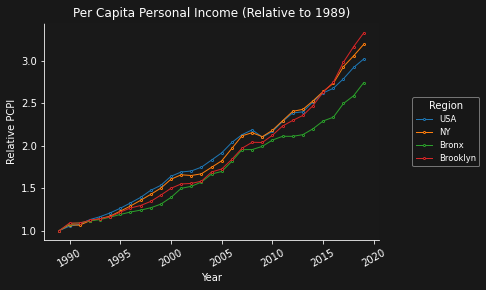

In [11]:
# Growth relative to 1989

fig = plt.figure()
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.9)


ax = plt.axes(facecolor="#191919", alpha=0.9)

# Plot data and add customizations
# Add label='region' for the legend
plot = plt.plot(dfPCPI_SmRel, linewidth = 1, marker='o', markerfacecolor='black', markersize=2, label='region')



# Axis Names
plt.xlabel('Year', color="white")
plt.ylabel('Relative PCPI', color="white") 


# X-Axis Spine and Ticks
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('#191919')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')

# X-Axis Tick Frequency and Increments
# xmax=ax.get_xlim()[1]
# xmin = ax.get_xlim()[0]
# ax.set_xticks(np.arange(round(xmin), xmax, 3))
_ = plt.xticks(rotation=30)

# Y-Axis Spine and Ticks
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('#191919')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')


# Y-Axis Tick Frequency and Increments
# ymax=ax.get_ylim()[1]
# ymin = ax.get_ylim()[0]
# ax.set_yticks(np.arange(ymin, ymax, .1))


# Plot Title 
plt.title('Per Capita Personal Income (Relative to 1989)', color="white")


# Change legend contents and title
regionlis = ['USA', 'NY', 'Bronx', 'Brooklyn']

plt.legend(regionlis, title="Region", bbox_to_anchor=(1.3, 0.5), loc='center right', ncol=1, borderaxespad=0., facecolor='#191919', framealpha=0.9, labelcolor='white', edgecolor='grey', fontsize='small')

# Set legend title color
ax.get_legend().get_title().set_color("white")


# plt.show()

In [ ]:
# Relative to USA average?

